# Keras: ANN to Predict the Presence of Drug Side Effects

## 1. Data Preparation and Processing

In [1]:
import numpy as np
import pandas as pd
import random
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [2]:
train_labels = []
train_samples = []

In [3]:
for i in range(50):
    # The ~5% of younger individuals who did experience side effects
    random_younger = random.randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)

    # The ~5% of older individuals who did not experience side effects
    random_older = random.randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    # The ~95% of younger individuals who did not experience side effects
    random_younger = random.randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)

    # The ~95% of older individuals who did experience side effects
    random_older = random.randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)

In [4]:
for i in train_samples:
    print(i)

63
90
32
82
23
71
35
80
23
88
28
65
62
72
24
70
32
69
60
77
50
92
58
75
20
76
35
78
38
69
21
83
51
66
20
92
13
91
25
84
34
69
37
79
51
98
58
94
48
75
28
76
50
95
49
71
63
97
13
76
16
77
14
74
38
94
21
99
32
95
53
94
60
97
24
82
52
88
26
84
45
88
57
67
57
85
37
70
38
93
42
95
33
65
49
76
58
66
23
75
48
84
45
80
16
82
31
84
37
88
31
70
62
66
48
73
52
79
17
80
60
67
48
67
48
99
22
68
33
100
27
89
44
94
33
96
21
75
27
96
30
86
61
100
37
71
29
94
25
80
47
97
39
99
21
73
34
68
45
87
58
91
46
100
36
100
28
71
14
83
54
79
53
75
16
84
29
74
23
69
55
89
13
75
56
97
50
98
28
98
54
97
56
98
56
90
36
92
61
87
46
65
47
79
53
100
46
71
15
66
58
84
50
67
47
75
49
92
45
98
17
94
21
74
30
78
25
86
17
88
26
89
26
86
45
89
32
89
13
99
48
91
38
93
57
83
41
97
30
84
47
100
14
97
49
79
62
99
64
78
45
99
61
79
55
72
42
79
55
81
47
77
50
81
37
86
33
95
19
74
16
66
33
89
48
75
40
75
43
96
27
91
61
78
60
89
58
87
37
66
36
81
35
74
48
93
41
81
37
65
55
90
29
68
25
83
24
87
27
85
14
92
46
69
48
84
34
68
57
67
29
6

In [5]:
for i in train_labels:
    print(i)

1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1


In [6]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

In [7]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

In [8]:
for i in scaled_train_samples:
    print(i)

[0.97701149]
[0.33333333]
[0.18390805]
[0.89655172]
[0.86206897]
[0.43678161]
[0.65517241]
[0.54022989]
[0.57471264]
[0.04597701]
[0.13793103]
[0.83908046]
[0.97701149]
[0.13793103]
[0.8045977]
[0.97701149]
[0.93103448]
[0.04597701]
[0.34482759]
[0.90804598]
[0.67816092]
[0.17241379]
[0.62068966]
[0.75862069]
[0.62068966]
[0.89655172]
[0.04597701]
[0.65517241]
[0.51724138]
[0.73563218]
[0.8045977]
[0.47126437]
[0.63218391]
[0.71264368]
[0.66666667]
[0.66666667]
[0.40229885]
[0.]
[0.62068966]
[0.40229885]
[0.87356322]
[0.8045977]
[0.05747126]
[0.20689655]
[0.44827586]
[0.75862069]
[0.71264368]
[0.52873563]
[0.65517241]
[0.08045977]
[0.64367816]
[0.74712644]
[0.57471264]
[0.51724138]
[0.81609195]
[0.86206897]
[0.89655172]
[0.51724138]
[0.73563218]
[0.13793103]
[0.98850575]
[0.14942529]
[0.22988506]
[0.88505747]
[0.36781609]
[0.42528736]
[0.3908046]
[0.24137931]
[0.31034483]
[0.75862069]
[0.24137931]
[0.72413793]
[0.54022989]
[0.45977011]
[0.36781609]
[0.82758621]
[0.85057471]
[0.2183908]

[0.86206897]
[0.77011494]
[0.6091954]
[0.6091954]
[0.20689655]
[0.3908046]
[0.45977011]
[0.51724138]
[0.63218391]
[0.59770115]
[0.14942529]
[0.8045977]
[0.55172414]
[0.64367816]
[0.88505747]
[0.13793103]
[0.98850575]
[0.68965517]
[0.02298851]
[0.65517241]
[0.5862069]
[0.14942529]
[0.6091954]
[0.86206897]
[0.90804598]
[0.63218391]
[0.05747126]
[0.66666667]
[0.17241379]
[0.31034483]
[0.98850575]
[0.4137931]
[0.12643678]
[0.85057471]
[0.85057471]
[0.11494253]
[0.33333333]
[0.70114943]
[0.27586207]
[0.16091954]
[0.49425287]
[0.8045977]
[0.83908046]
[0.55172414]
[0.33333333]
[0.12643678]
[0.48275862]
[0.18390805]
[0.13793103]
[0.27586207]
[0.62068966]
[0.27586207]
[0.01149425]
[0.83908046]
[0.77011494]
[0.25287356]
[0.04597701]
[0.77011494]
[0.43678161]
[0.54022989]
[0.44827586]
[0.4137931]
[0.43678161]
[0.73563218]
[0.11494253]
[0.51724138]
[0.67816092]
[0.71264368]
[0.65517241]
[0.37931034]
[1.]
[0.86206897]
[0.94252874]
[0.28735632]
[0.18390805]
[0.67816092]
[0.75862069]
[0.1954023]
[0.6

## 2. Building ANN Sequential Model

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [10]:
model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

c:\Users\shahr\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 642 (2.51 KB)

 Trainable params: 642 (2.51 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
model.fit(x=scaled_train_samples, y=train_labels, validation_split=0.1, batch_size=10, epochs=30, shuffle=True, verbose=2)

Epoch 1/30
189/189 - 2s - 8ms/step - accuracy: 0.5344 - loss: 0.6570 - val_accuracy: 0.5143 - val_loss: 0.6544
Epoch 2/30
189/189 - 0s - 1ms/step - accuracy: 0.5921 - loss: 0.6361 - val_accuracy: 0.5810 - val_loss: 0.6361
Epoch 3/30
189/189 - 0s - 1ms/step - accuracy: 0.6519 - loss: 0.6135 - val_accuracy: 0.6524 - val_loss: 0.6110
Epoch 4/30
189/189 - 0s - 1ms/step - accuracy: 0.7201 - loss: 0.5840 - val_accuracy: 0.7048 - val_loss: 0.5812
Epoch 5/30
189/189 - 0s - 1ms/step - accuracy: 0.7561 - loss: 0.5548 - val_accuracy: 0.7524 - val_loss: 0.5536
Epoch 6/30
189/189 - 0s - 1ms/step - accuracy: 0.7799 - loss: 0.5264 - val_accuracy: 0.8048 - val_loss: 0.5237
Epoch 7/30
189/189 - 0s - 1ms/step - accuracy: 0.8175 - loss: 0.4967 - val_accuracy: 0.8190 - val_loss: 0.4944
Epoch 8/30
189/189 - 0s - 1ms/step - accuracy: 0.8381 - loss: 0.4683 - val_accuracy: 0.8286 - val_loss: 0.4659
Epoch 9/30
189/189 - 0s - 1ms/step - accuracy: 0.8550 - loss: 0.4415 - val_accuracy: 0.8524 - val_loss: 0.4386
E

## 3. Preprocess Test Data

In [14]:
test_labels = []
test_samples = []

In [15]:
for i in range(10):
    # The ~5% of younger individuals who did experience side effects
    random_younger = random.randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)

    # The ~5% of older individuals who did not experience side effects
    random_older = random.randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(200):
    # The ~95% of younger individuals who did not experience side effects
    random_younger = random.randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)

    # The ~95% of older individuals who did experience side effects
    random_older = random.randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

In [16]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

In [17]:
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

## 4. Predict using Test Set

In [18]:
predictions = model.predict(x=scaled_test_samples, batch_size=10, verbose=0)

In [19]:
for i in predictions:
    print(i)

[0.08824842 0.9117516 ]
[0.1953063  0.80469376]
[0.03520913 0.9647909 ]
[0.96376526 0.0362347 ]
[0.02537113 0.97462887]
[0.2925093  0.70749074]
[0.95944536 0.04055464]
[0.77685475 0.22314522]
[0.07200778 0.9279922 ]
[0.08824842 0.9117516 ]
[0.95127505 0.04872498]
[0.03089612 0.96910393]
[0.06282623 0.9371738 ]
[0.05532421 0.9446758 ]
[0.13998789 0.8600121 ]
[0.04009933 0.9599006 ]
[0.9621419  0.03785817]
[0.02537113 0.97462887]
[0.9606228  0.03937719]
[0.8557086  0.14429143]
[0.96298194 0.03701807]
[0.8557086  0.14429143]
[0.0289359 0.9710641]
[0.02709659 0.97290343]
[0.61026675 0.38973328]
[0.95127505 0.04872498]
[0.1953063  0.80469376]
[0.7273261 0.2726739]
[0.1953063  0.80469376]
[0.0289359 0.9710641]
[0.9580561  0.04194389]
[0.06692406 0.9330759 ]
[0.13998789 0.8600121 ]
[0.06692406 0.9330759 ]
[0.0289359 0.9710641]
[0.4132459  0.58675414]
[0.95944536 0.04055464]
[0.9613895  0.03861051]
[0.9620653  0.03793475]
[0.0289359 0.9710641]
[0.03757787 0.96242213]
[0.35048786 0.6495122 ]
[0

In [20]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [21]:
for i in rounded_predictions:
    print(i)

1
1
1
0
1
1
0
0
1
1
0
1
1
1
1
1
0
1
0
0
0
0
1
1
0
0
1
0
1
1
0
1
1
1
1
1
0
0
0
1
1
1
0
0
0
0
0
1
0
1
1
1
1
0
1
1
1
1
0
1
0
0
0
0
1
1
1
0
1
1
0
1
0
0
1
1
0
1
1
0
0
0
0
1
1
0
0
0
1
1
0
0
1
1
0
0
0
1
1
0
1
1
1
1
0
0
0
0
0
1
1
1
0
1
1
0
0
1
1
1
0
1
0
1
0
0
1
0
1
0
0
0
1
0
0
0
0
0
0
1
0
1
1
1
0
0
0
1
1
0
1
1
0
0
1
0
1
1
1
0
1
1
1
0
1
0
0
1
0
1
0
0
1
0
1
0
1
0
0
1
0
0
1
0
0
0
1
0
0
0
1
0
1
0
0
1
1
0
0
1
0
0
1
1
1
1
0
1
1
1
1
1
1
1
0
1
0
0
1
0
1
1
1
1
1
1
0
1
1
1
1
1
0
1
0
0
1
0
1
1
0
1
1
0
0
1
1
1
1
1
1
1
0
0
1
1
0
1
1
1
1
0
0
1
1
0
0
0
0
1
1
1
0
1
1
1
1
0
1
1
0
1
1
1
0
0
0
0
0
1
1
0
0
1
1
0
0
0
1
0
1
1
1
1
0
0
0
1
0
1
1
1
1
0
1
0
1
1
0
0
0
1
0
0
0
1
0
1
1
0
1
1
0
0
0
0
1
1
1
1
1
1
0
1
0
0
0
1
1
1
1
0
1
1
1
0
0
0
0
0
1
1
1
1
1
0
1
0
0
0
0
1
0
1
0
0
0
0
0
0
1
1
0
0
0
1
0
0
0
1
1
0
1
1
0
0
0
1
1
0
1
0
0
1
1
1
1
0
1
0
0
0
0
1
0
0
0
0
1
0


## 5. Confusion Matrix

In [22]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [24]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment='center', color='white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[191  19]
 [ 10 200]]


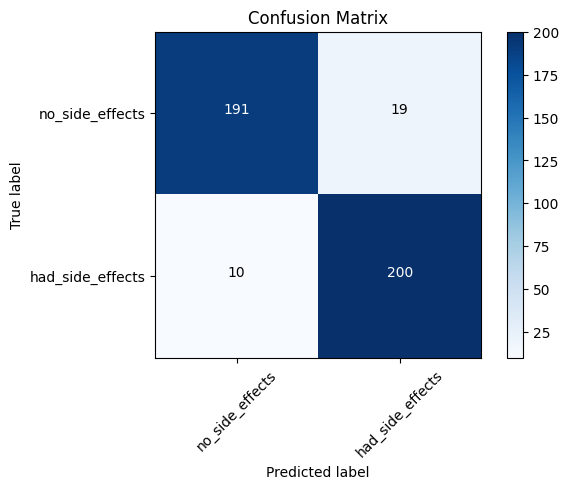

In [25]:
cm_plot_labels = ['no_side_effects', 'had_side_effects']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

## 6. Save the Model

In [26]:
import os.path
if os.path.isfile('medical_trial_model.h5') is False:
    model.save('medical_trial_model.h5')

In [27]:
from tensorflow.keras.models import load_model

new_model = load_model('medical_trial_model.h5')

In [28]:
new_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 644 (2.52 KB)

 Trainable params: 642 (2.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [29]:
new_model.get_weights()

[array([[-0.34266892, -0.24477166,  0.6669702 ,  0.7337834 , -0.25837594,
         -0.23238581, -0.1545684 ,  0.54717815, -0.3594131 ,  0.23309885,
         -0.47955364,  0.54676986, -0.39208618, -0.11139289,  0.6695129 ,
          0.4676043 ]], dtype=float32),
 array([ 0.        ,  0.        , -0.14160098, -0.11162893,  0.        ,
         0.        ,  0.        ,  0.24688858,  0.        , -0.08391975,
         0.        , -0.18118663,  0.        ,  0.        , -0.14325431,
        -0.14673911], dtype=float32),
 array([[ 0.17530158, -0.16639937, -0.1710255 , -0.00458735, -0.07485855,
          0.01580474,  0.10211331, -0.18630087, -0.05149704,  0.05869034,
         -0.24319187, -0.17998104, -0.31403026,  0.08782637, -0.13921508,
          0.08808893, -0.02570873, -0.12283421,  0.3021954 ,  0.25751397,
         -0.24470636, -0.10022631, -0.2604136 ,  0.31429866,  0.14297348,
          0.31231377, -0.18266916,  0.05662799,  0.18687078, -0.13460068,
         -0.21875967,  0.16710988],
 

In [30]:
new_model.optimizer